In [1]:
import sys
print(sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print ("Scikit-Learn version: ", sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)
Scikit-Learn version:  1.3.0


## data preparation

In [20]:
from pathlib import Path

path = Path() / "npz"
print(path)

npz


In [25]:
my_data_num = np.load(path / "fixed2_final_num.npz")
my_data_sym = np.load(path / "fixed2_final_sym.npz")

In [14]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    # Show axis for now
    # plt.axis("off")

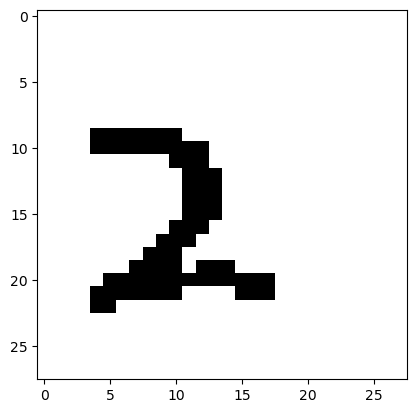

In [15]:
sample_num = my_data_num['img'][2]
plot_digit(sample_num)
plt.show()

just a sample data, nothing special(expect it is biased)

## data rebase - test

In [6]:
row = 28
col = 28

sample_num = np.reshape(sample_num, (28,28))

# each boundary
row_top = 28
row_bot = -1
col_left = 28
col_right = -1

for i in range(row):
    for j in range(col):
    
        # if the pixel has whatever value
        if sample_num[i][j] != 0:
            # update the boundary
            row_top = min(row_top, i)
            row_bot = max(row_bot, i)
            col_left = min(col_left, j)
            col_right = max(col_right, j)
            

print(row_top,row_bot,col_left,col_right)

9 22 4 17


14 14 7 7


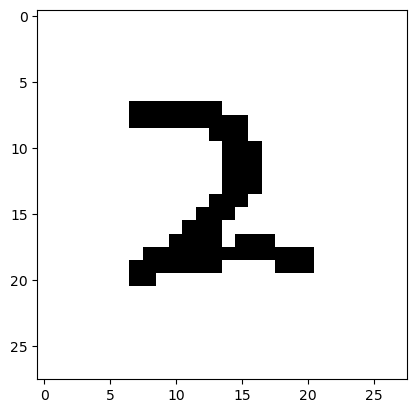

In [7]:
col_len = col_right - col_left + 1
row_len = row_bot - row_top + 1

col_start = int((28 - col_len) / 2)
row_start = int((28 - row_len) / 2)

print(col_len,row_len,col_start,row_start)

new_sample = np.zeros((28,28),dtype="int64")

# rebase into a center
new_sample[row_start:row_start+row_len, col_start:col_start+col_len] = sample_num[row_top:row_bot+1, col_left:col_right+1]
plot_digit(new_sample)
plt.show()

so the plan here is quite simple; get the boundary of the data, and rebase into the center
test done, so let's define the function and apply to all of our data

In [26]:
def rebase_center(num_data):
    r = 28
    c = 28

    temp_num = np.reshape(num_data, (r,c))

    # each boundary
    r_top = r
    r_bot = -1
    c_left = c
    c_right = -1

    for n in range(r):
        for m in range(c):
            
            # if the pixel has whatever value
            if temp_num[n][m] != 0:
                # update the boundary
                r_top = min(r_top, n)
                r_bot = max(r_bot, n)
                c_left = min(c_left, m)
                c_right = max(c_right, m)
    
    # print(r_top,r_bot,c_left,c_right)
    
    c_len = c_right - c_left + 1
    r_len = r_bot - r_top + 1

    c_start = int((c - c_len) / 2)
    r_start = int((r - r_len) / 2)

    # print(c_len,r_len,c_start,r_start)

    rebased_data = np.zeros((r,c),dtype="int64")

    # rebase into a center
    rebased_data[r_start:r_start+r_len, c_start:c_start+c_len] = temp_num[r_top:r_bot+1, c_left:c_right+1]
    
    return np.reshape(rebased_data, r*c)

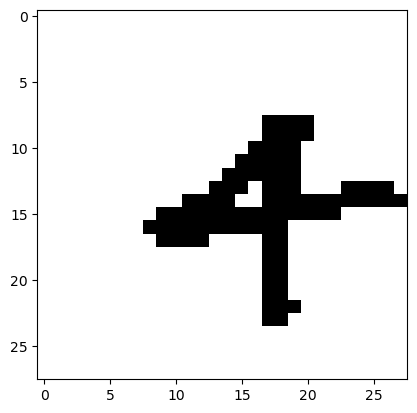

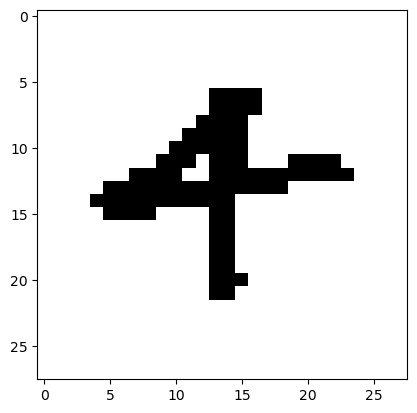

In [27]:
test_num = my_data_num["img"][4]
plot_digit(test_num)
plt.show()
test_num = rebase_center(test_num)
plot_digit(test_num)
plt.show()

## rebase - actual

In [46]:
num_size = np.shape(my_data_num["img"])[0]
sym_size = np.shape(my_data_sym["img"])[0]

num_rebased = my_data_num["img"]
sym_rebased = my_data_sym["img"]

print(num_size)

for i in range(num_size):
    num_rebased[i] = rebase_center(num_rebased[i])
    sym_rebased[i] = rebase_center(sym_rebased[i])

1600


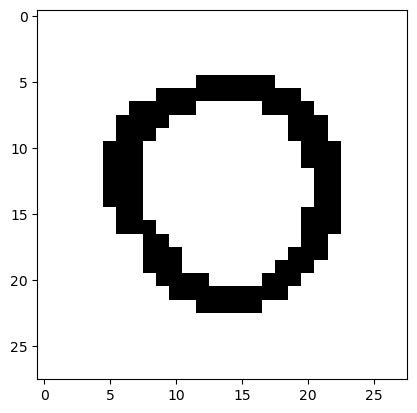

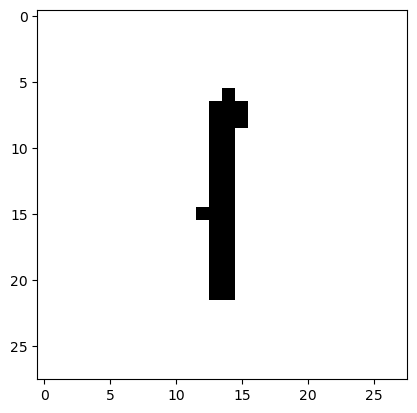

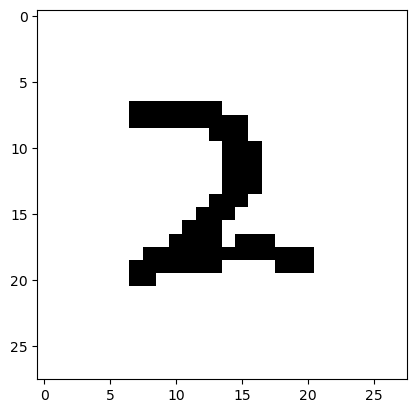

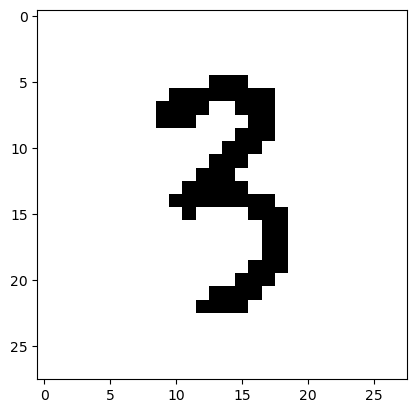

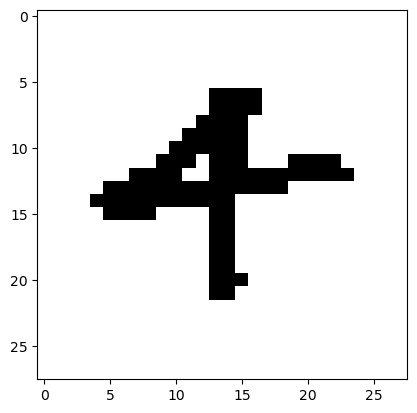

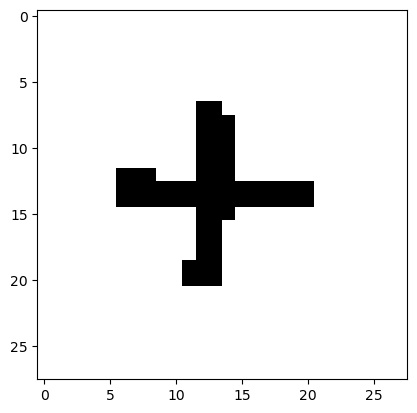

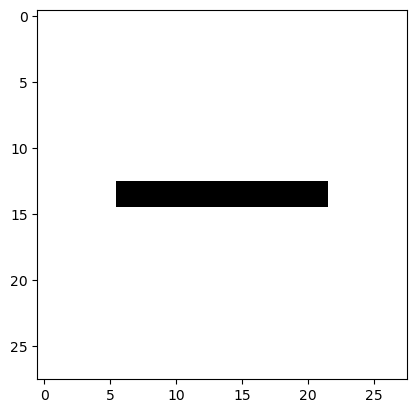

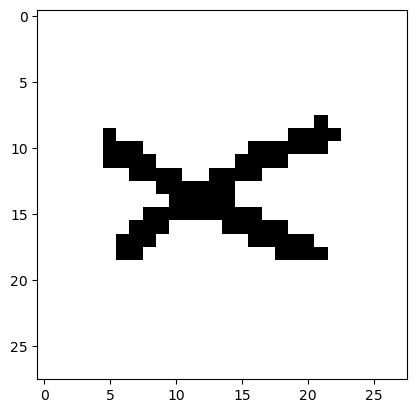

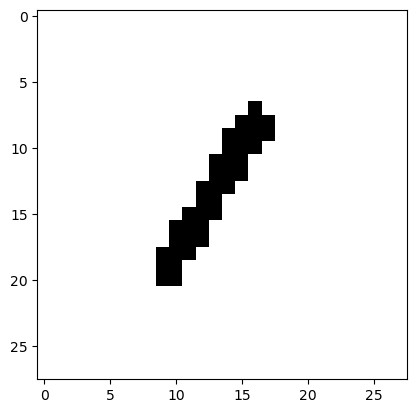

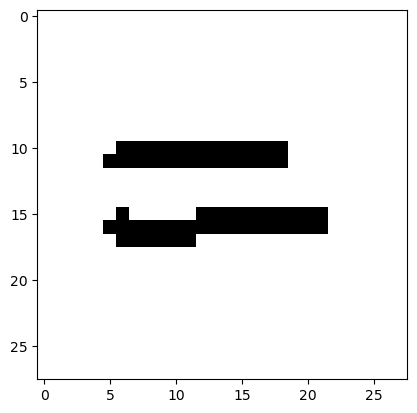

In [48]:
for i in range(5):
    plot_digit(num_rebased[i])
    plt.show()

for i in range(5):
    plot_digit(sym_rebased[i])
    plt.show()